In [10]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Load the penguin dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a histogram of flipper_length_mm for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", nbins=20, title="Flipper Length Distribution by Species")

# Calculate key statistics for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std',
    Q1=lambda x: np.percentile(x.dropna(), 25),
    Q3=lambda x: np.percentile(x.dropna(), 75)
).dropna()

# Add lines and rectangles for each species
for species, row in species_stats.iterrows():
    mean_flipper = row['mean']
    median_flipper = row['median']
    min_flipper = row['min']
    max_flipper = row['max']
    std_flipper = row['std']
    Q1_flipper = row['Q1']
    Q3_flipper = row['Q3']
    
    # Mean and median lines
    fig.add_vline(x=mean_flipper, line=dict(color="purple", width=2), annotation_text=f'{species} mean', annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color="orange", width=2), annotation_text=f'{species} median', annotation_position="top left")
    
    # Range (min to max)
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="green", opacity=0.1, line_width=0)
    
    # Interquartile Range (Q1 to Q3)
    fig.add_vrect(x0=Q1_flipper, x1=Q3_flipper, fillcolor="blue", opacity=0.1, line_width=0)
    
    # 2 standard deviations from the mean
    lower_bound = mean_flipper - 2 * std_flipper
    upper_bound = mean_flipper + 2 * std_flipper
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="red", opacity=0.1, line_width=0)

# Show the figure
fig.show()


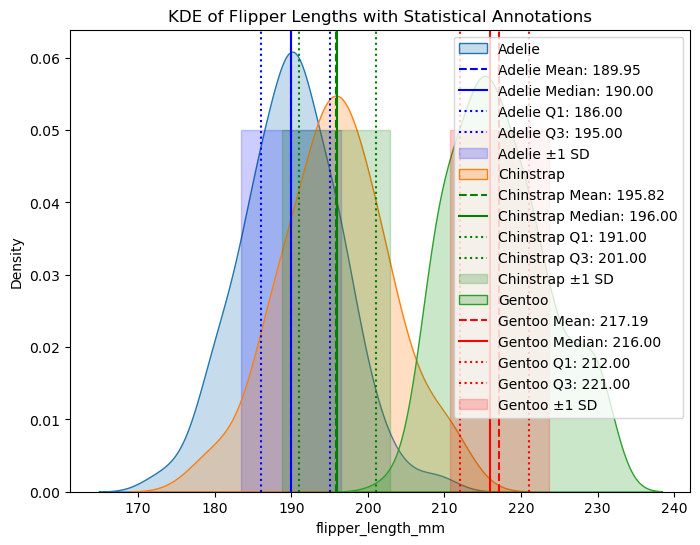

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# Load the dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop NaN values in flipper_length_mm and species
penguins = pingees.dropna(subset=["flipper_length_mm", "species"])

# Function to calculate and return stats
def get_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    std = np.std(data)
    return mean, median, q1, q3, iqr, std

# Set up the Plotly histogram traces for each species
species = penguins['species'].unique()
colors = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}

histogram_traces = []
for sp in species:
    species_data = penguins[penguins['species'] == sp]
    trace = go.Histogram(
        x=species_data['flipper_length_mm'],
        name=f'{sp} Flipper Length',
        marker_color=colors[sp],
        opacity=0.5,
        histnorm='probability density',
    )
    histogram_traces.append(trace)

# Create a figure for Plotly
fig = go.Figure(data=histogram_traces)

# Create a Seaborn KDE plot and extract KDE data to overlay
plt.figure(figsize=(8, 6))
for sp in species:
    species_data = penguins[penguins['species'] == sp]['flipper_length_mm']
    
    # Plot KDE
    sns.kdeplot(species_data, label=sp, fill=True)
    
    # Get statistics
    mean, median, q1, q3, iqr, std = get_stats(species_data)
    
    # Add lines for mean, median, IQR, and SD
    plt.axvline(mean, color=colors[sp], linestyle='--', label=f'{sp} Mean: {mean:.2f}')
    plt.axvline(median, color=colors[sp], linestyle='-', label=f'{sp} Median: {median:.2f}')
    plt.axvline(q1, color=colors[sp], linestyle=':', label=f'{sp} Q1: {q1:.2f}')
    plt.axvline(q3, color=colors[sp], linestyle=':', label=f'{sp} Q3: {q3:.2f}')
    plt.fill_betweenx([0, 0.05], mean - std, mean + std, color=colors[sp], alpha=0.2, label=f'{sp} ±1 SD')

plt.legend()
plt.title('KDE of Flipper Lengths with Statistical Annotations')
plt.show()

# Finally, show the Plotly histograms
fig.update_layout(
    barmode='overlay',
    title='Histogram of Flipper Length by Species with KDE Overlay',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Density',
)
fig.show()


I chose KDE because I thought it would present the data more smoothly. Actually, KDE and histogram have a lot of similarities. But compared to histogram it smooths out the estimation of the density of the data and helps to understand the overall shape of the distribution without being limited by the bar like histograms. It is an excellent tool for visualizing underlying patterns in continuous data.

In [ ]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md


fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Which datasets have similar means and similar variances
A and C and B have similar mean. 
A and C have similar variances

Which datasets have similar means but quite different variances
A and B

Which datasets have similar variances but quite different means
B and D

Which datasets have quite different means and quite different variances
D with A, B, C

In [12]:
from scipy import stats
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means and variances
means = {
    "A": np.mean(data1),
    "B": np.mean(data2),
    "C": np.mean(data3),
    "D": np.mean(data4)
}

variances = {
    "A": np.var(data1),
    "B": np.var(data2),
    "C": np.var(data3),
    "D": np.var(data4)
}

means, variances


({'A': 5.014375958192006,
  'B': 4.94671000878787,
  'C': 5.0037628418678795,
  'D': 6.0066228307833835},
 {'A': 8.215806603088728,
  'B': 2.2290789277158947,
  'C': 9.129745445562454,
  'D': 0.25628980414746616})

https://chatgpt.com/share/66f61307-b684-8009-94e3-34e9d45eed97

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   restaurant id                  750 non-null    int64  
 1   category id                    750 non-null    int64  
 2   item id                        750 non-null    int64  
 3   serving size (oz)              395 non-null    float64
 4   calories                       750 non-null    int64  
 5   calories from fat              260 non-null    float64
 6   total fat (g)                  750 non-null    object 
 7   total fat (% daily value)      260 non-null    float64
 8   saturated fat (g)              637 non-null    float64
 9   saturated fat (% daily value)  260 non-null    float64
 10  trans fat (g)                  637 non-null    float64
 11  cholesterol (mg)               637 non-null    float64
 12  cholesterol (% daily value)  

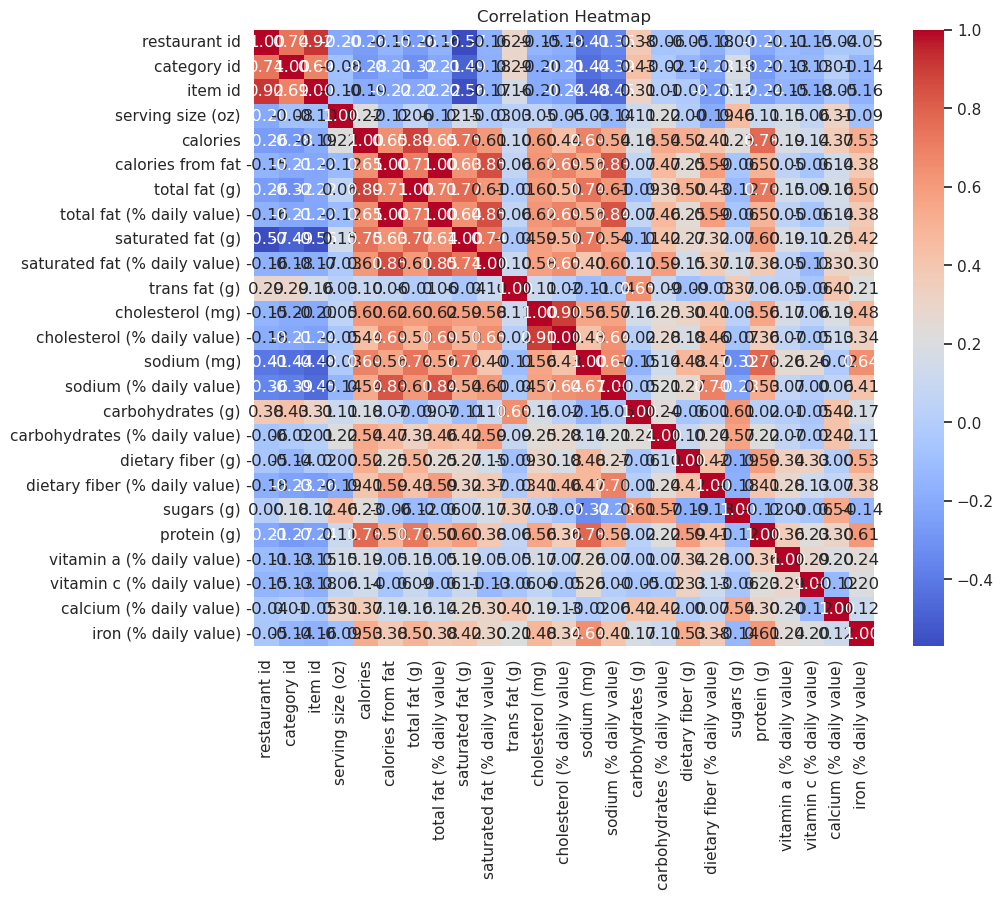

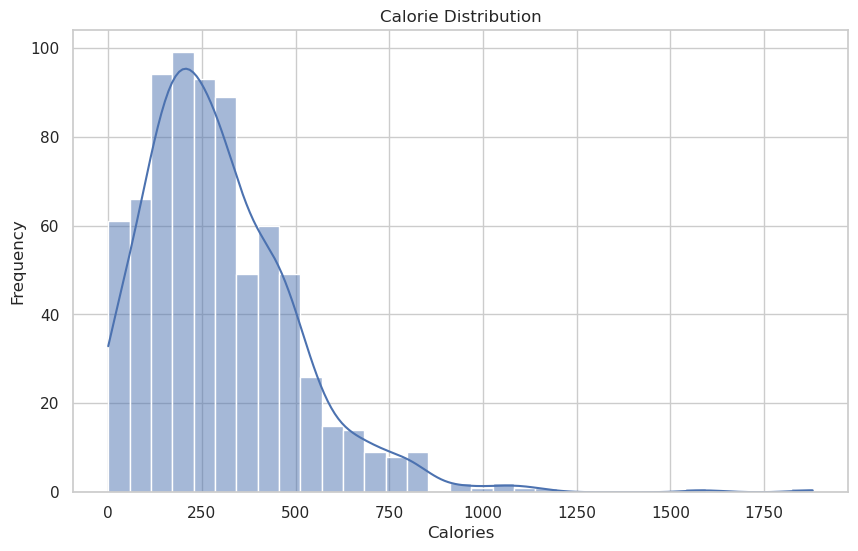

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Failed to load data: {e}")
    exit()

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Convert all columns that should be numeric but are object type due to errors in the data
numeric_columns = ['calories', 'total fat (g)', 'saturated fat (g)', 'cholesterol (mg)', 'sodium (mg)', 'carbohydrates (g)', 'dietary fiber (g)', 'sugars (g)', 'protein (g)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate summary statistics for numeric columns
print("\nSummary Statistics:")
summary_statistics = df.describe()
print(summary_statistics)

# Check for missing values in the dataset
print("\nMissing Values:")
missing_values = df.isna().sum()
print(missing_values)

# Handling missing values - fill with the median (numeric columns only)
if missing_values.any():
    df_filled = df.fillna(df.median(numeric_only=True))
    print("\nFilled Dataset Statistics:")
    print(df_filled.describe())

    # Visual analysis: Correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_filled.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # Histogram for visualizing distributions of key columns
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filled['calories'], kde=True)
    plt.title('Calorie Distribution')
    plt.xlabel('Calories')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No missing values to handle.")


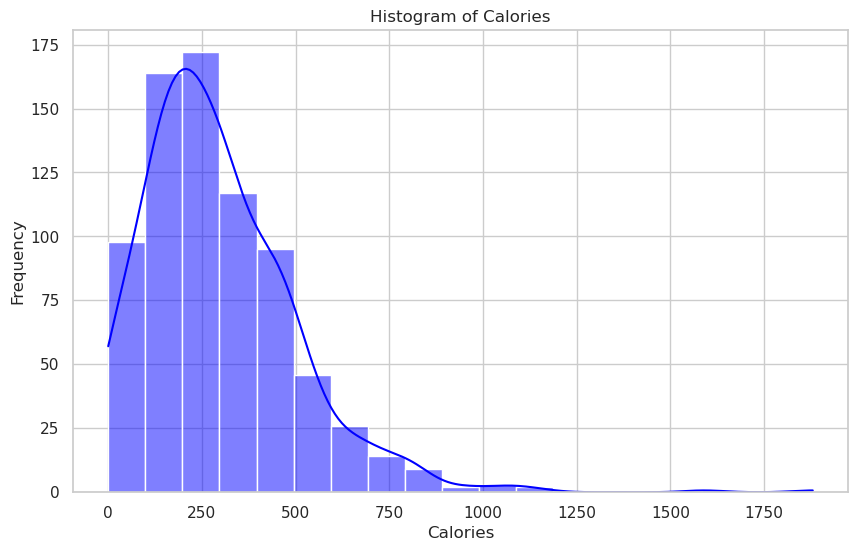

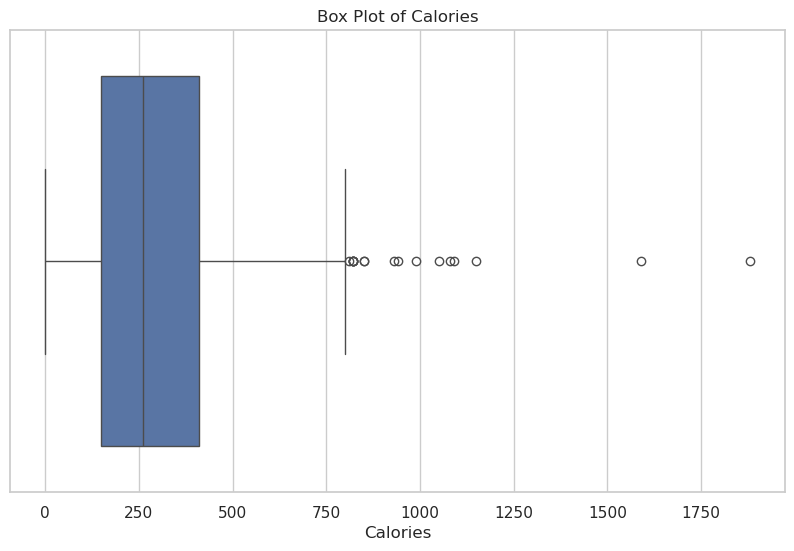

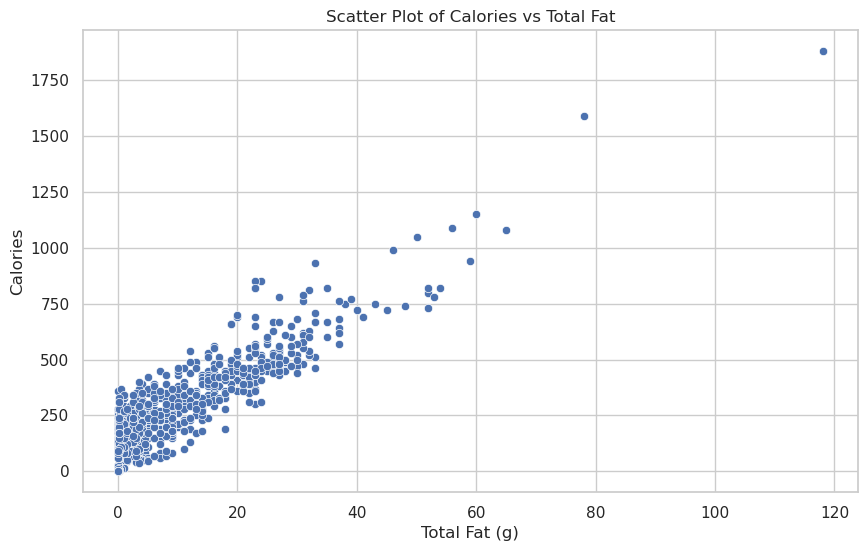

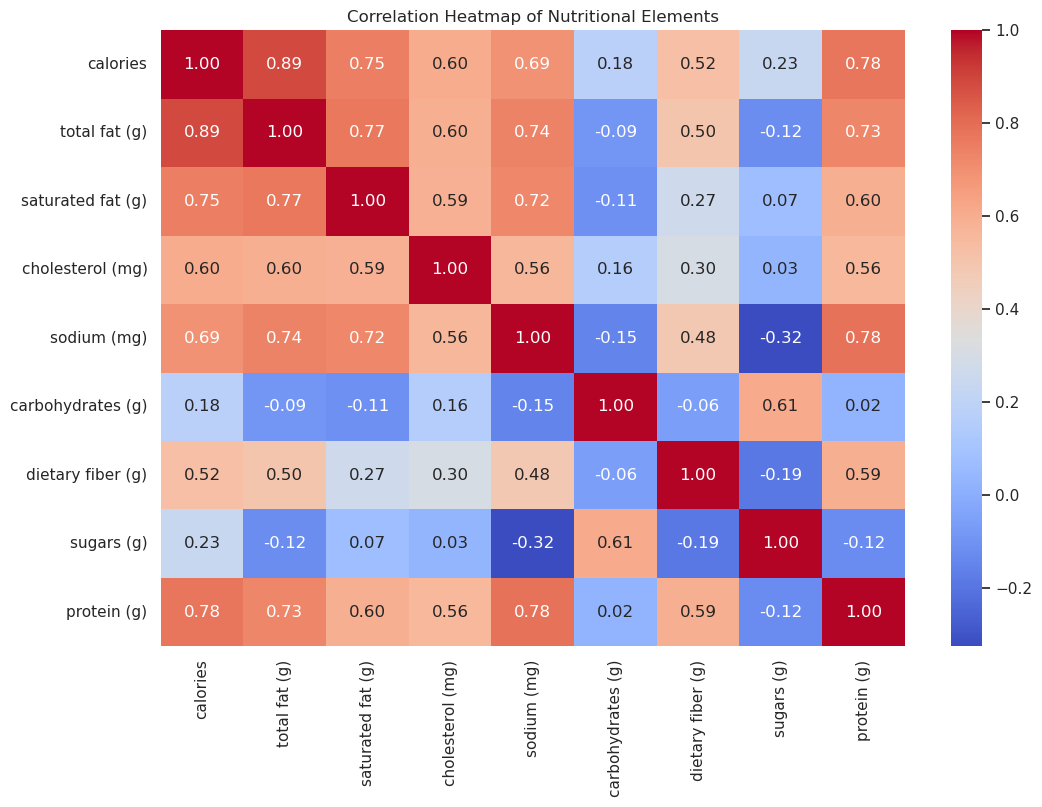

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Data Cleaning: Convert columns to numeric and handle missing values
numeric_columns = ['calories', 'total fat (g)', 'saturated fat (g)', 'cholesterol (mg)', 'sodium (mg)', 'carbohydrates (g)', 'dietary fiber (g)', 'sugars (g)', 'protein (g)']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Coerce errors turn non-numeric values into NaN

# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of Calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], kde=True, color='blue', binwidth=100)
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Calories distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='calories', data=df)
plt.title('Box Plot of Calories')
plt.xlabel('Calories')
plt.show()

# Scatter plot of Calories vs. Total Fat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total fat (g)', y='calories', data=df)
plt.title('Scatter Plot of Calories vs Total Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.show()

# Correlation heatmap of nutritional elements
# Selecting relevant columns for correlation
nutritional_info = df[['calories', 'total fat (g)', 'saturated fat (g)', 'cholesterol (mg)', 'sodium (mg)', 'carbohydrates (g)', 'dietary fiber (g)', 'sugars (g)', 'protein (g)']]
correlation_matrix = nutritional_info.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Elements')
plt.show()


This dataset shows the nutirent in diiferent food items, and ranging from low to high calories.The dataset show clear information to people who want to eat fast food but also considered about healthy.
Interesting is that in the box plot a lot of data with high calaries food are outliers. The Max claries is 1880 which too high. And second quartile is about 260.
On the diagram that claries with fat we can say that the claries is proportional with the fat. So they are highly related.
The fun thing that I never know is that the sodium is highly related with protein
On the higtogram I find that most of food arround 250, which is not same with my assumption. I was assume most of them will at 400. So most of food is not contain excess calories, which are not that bad to our healthy.

https://chatgpt.com/share/66f61e17-0cd0-8009-b2e1-6bf09e963317